# Recomendação de  Leads

O objetivo deste produto é fornecer um serviço automatizado que recomenda leads para um usuário dado sua atual lista de clientes (Portfólio).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocessing_lib as prep
import recommendation_lib as rec
import coord_lib
import viz_lib

%matplotlib inline

plt.rcParams['xtick.labelsize']  = 16
plt.rcParams['ytick.labelsize']  = 16
plt.rcParams['axes.labelsize']   = 16
plt.rcParams['axes.titlesize']   = 16
plt.rcParams['legend.fontsize']  = 16

## Pré-processamento

A primeira etapa consiste em carregar o dataset contendo informações sobre as empresas do mercado a ser considerado. 

Utilizando os métodos desenvolvidos na biblioteca de pré-processamento, o mesmo foi filtrado de modo que apenas as colunas com menos de 30% de dados faltantes foram consideradas.

A seleção de parâmetros foi feita da seguinte forma:

- Variáveis booleanas: menos de 80% dos valores em uma só categoria;

- Variáveis categóricas e numéricas: selecionadas as que continham informações relevantes e menos especícifas sobre as empresas.

Os parâmetros do dataset resultante foram então transformados e normalizados.

In [2]:
df = prep.loading_data('../data/estaticos_market.csv')
df_processed = prep.process(df)
df_transformed = prep.transform(df_processed)

## Modelagem do Algoritmo de Clusterização

O algortimo KMeans foi adotado para realizar a clusterização do dataset de mercado e, para selecionar o número de clusters, o "elbow method" foi utilizado.

A avaliação foi feita utilizando o dataset já transformado e normalizado e o número de clusters foi variado no intervalo de 2 a 20.

In [3]:
elb  = []
kmax = 20

for k in range(2, kmax+1, 1):
    kmeans = rec.kMeans_training(df_transformed, n_clusters=k)
    elb.append(kmeans.inertia_)

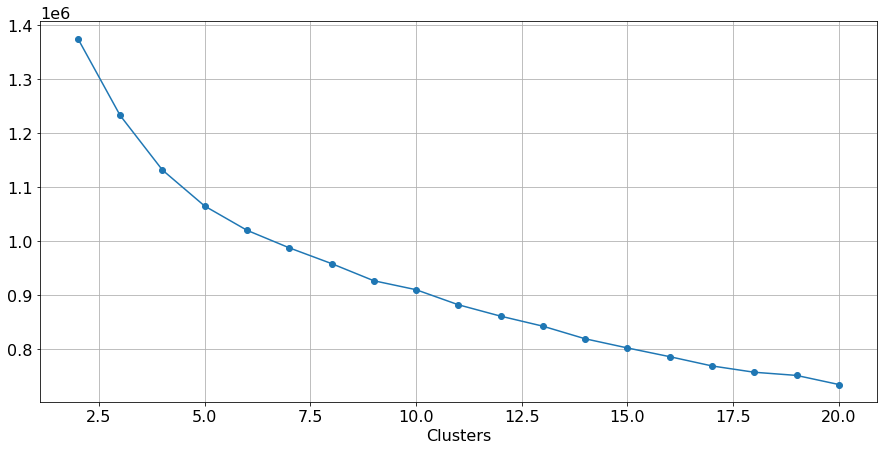

In [4]:
k = list(range(2,21,1))

plt.figure(figsize=(15,7))
plt.plot(k,elb,'-o');
plt.grid()
plt.xlabel('Clusters')
plt.show()

## Treinamento do Modelo

Após análise dos resultados obtidos com diferentes quantidades de clusters, foi determinado que no sistema de recomendação a ser desenvolvido serão utilizados 7 clusters como padrão. Esse número pode ser configurado da maneira que o usuário desejar.

In [5]:
kmeans = rec.kMeans_training(df_transformed, n_clusters=7)

market_labels = rec.market_clusters(kmeans)

In [6]:
market_labels.to_csv('../output/market_clusters.csv', index=False)

## Recomendação de Leads

O sistema de recomendação desenvolvido seleciona os clusters que possuem mais de 15% dos clientes presentes no portfólio analisado e recomenda 5000 leads que possuem similaridade de cosseno maior que 0.9 com o maior número de clientes do portfólio.  

A seguir, os resultados obtidos para cada um dos portfólios disponibilizados são apresentados. Em cada um deles, o número de leads recomendados é 5000.

In [7]:
market = prep.loading_data('../data/estaticos_market.csv')
coord_micro = pd.read_csv("../data/coord_micro.csv")

### Portfólio 1

In [8]:
portfolio_file = '../data/estaticos_portfolio1.csv'

portfolio1 = prep.loading_data(portfolio_file)
portfolio1 = rec.portfolio_clusters(market_labels, portfolio1)

portfolio1_coord_info = market[['nm_micro_regiao','de_ramo']][market_labels['id'].isin(portfolio1['id'])].reset_index(drop=True)
portfolio1_coord = portfolio1.merge(portfolio1_coord_info, left_index=True, right_index=True)

In [9]:
recommended_leads_1 = rec.recommend_leads(portfolio1, df, market_labels, n_leads=5000)
recommended_leads_1.reset_index(drop=True, inplace=True)

leads_coord_info_1 = market[['nm_micro_regiao','de_ramo']][market_labels['id'].isin(recommended_leads_1['id'])]
leads_coord_1 = recommended_leads_1.merge(leads_coord_info_1, left_index=True, right_index=True)

In [10]:
mapcoords_Old_1 = coord_lib.getlatlong_list(portfolio1_coord, coord_micro, flag_miss=False, flag_ramo=True)
mapcoords_New_1 = coord_lib.getlatlong_list(leads_coord_1, coord_micro, flag_miss=False, flag_ramo=True)

viz_lib.braziliconmap(mapcoords_Old_1, mapcoords_New_1)

64 companies without information about the belonging micro region
2 companies without information about the belonging micro region


In [11]:
recommended_leads_1.to_csv('../output/leads_1.csv', index=False)

### Portfólio 2

In [12]:
portfolio_file = '../data/estaticos_portfolio2.csv'

portfolio2 = prep.loading_data(portfolio_file)
portfolio2 = rec.portfolio_clusters(market_labels, portfolio2)

portfolio2_coord_info = market[['nm_micro_regiao','de_ramo']][market_labels['id'].isin(portfolio2['id'])].reset_index(drop=True)
portfolio2_coord = portfolio2.merge(portfolio2_coord_info, left_index=True, right_index=True)

In [13]:
recommended_leads_2 = rec.recommend_leads(portfolio2, df, market_labels, n_leads=5000)
recommended_leads_2.reset_index(drop=True, inplace=True)

leads_coord_info_2 = market[['nm_micro_regiao','de_ramo']][market_labels['id'].isin(recommended_leads_2['id'])]
leads_coord_2 = recommended_leads_2.merge(leads_coord_info_2, left_index=True, right_index=True)

In [14]:
mapcoords_Old_2 = coord_lib.getlatlong_list(portfolio2_coord, coord_micro, flag_miss=False, flag_ramo=True)
mapcoords_New_2 = coord_lib.getlatlong_list(leads_coord_2, coord_micro, flag_miss=False, flag_ramo=True)

viz_lib.braziliconmap(mapcoords_Old_2, mapcoords_New_2)

70 companies without information about the belonging micro region
12 companies without information about the belonging micro region


In [15]:
recommended_leads_2.to_csv('../output/leads_2.csv', index=False)

### Portfólio 3

In [16]:
portfolio_file = '../data/estaticos_portfolio3.csv'

portfolio3 = prep.loading_data(portfolio_file)
portfolio3 = rec.portfolio_clusters(market_labels, portfolio3)

portfolio3_coord_info = market[['nm_micro_regiao','de_ramo']][market_labels['id'].isin(portfolio3['id'])].reset_index(drop=True)
portfolio3_coord = portfolio3.merge(portfolio3_coord_info, left_index=True, right_index=True)

In [17]:
recommended_leads_3 = rec.recommend_leads(portfolio3, df, market_labels, n_leads=5000)
recommended_leads_3.reset_index(drop=True, inplace=True)

leads_coord_info_3 = market[['nm_micro_regiao','de_ramo']][market_labels['id'].isin(recommended_leads_3['id'])]
leads_coord_3 = recommended_leads_3.merge(leads_coord_info_3, left_index=True, right_index=True)

In [18]:
mapcoords_Old_3 = coord_lib.getlatlong_list(portfolio3_coord, coord_micro, flag_miss=False, flag_ramo=True)
mapcoords_New_3 = coord_lib.getlatlong_list(leads_coord_3, coord_micro, flag_miss=False, flag_ramo=True)

viz_lib.braziliconmap(mapcoords_Old_3, mapcoords_New_3)

24 companies without information about the belonging micro region
8 companies without information about the belonging micro region


In [19]:
recommended_leads_3.to_csv('../output/leads_3.csv', index=False)